In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import matplotlib.patches as mpatches # For legend for pyplot
from sklearn.datasets import load_iris # Our dataset comes with scikitlearn
from sklearn.neighbors import KNeighborsClassifier # KNN from scikitlearn

In [12]:
iris = load_iris()
iris.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

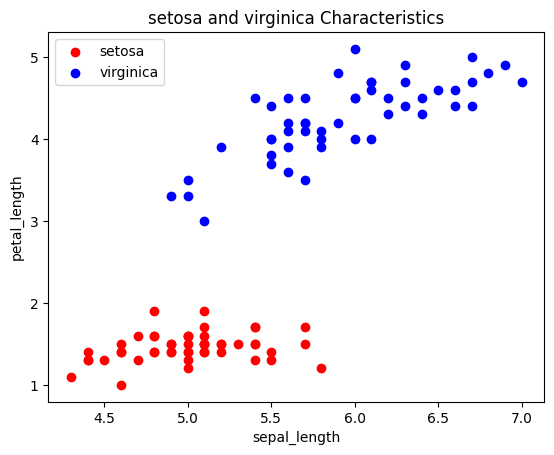

In [15]:

#music = pd.DataFrame()

# Some data to play with
sepal_length = iris.data[:,0]
petal_length = iris.data[:,2]
species = iris.target

# Look at the data
plt.scatter(
    sepal_length[iris.target == 0],
    petal_length[iris.target == 0],
    color='red'
)
plt.scatter(
    sepal_length[iris.target == 1],
    petal_length[iris.target == 1],
    color='blue'
)

plt.legend(['setosa', 'virginica'])
plt.title('setosa and virginica Characteristics')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = np.c_[sepal_length, petal_length]
Y = species
neighbors.fit(X[:120] ,Y[:120])

x_p1 = np.array([[0,0]])

## Predict for a song with 24 loudness that's 190 seconds long.
y_hat =neighbors.predict(x_p1)
print(iris.target_names[y_hat])

['setosa']


In [25]:
x_p2 = np.array([[6,4]])
y_hat = neighbors.predict(x_p2)
print(iris.target_names[y_hat])

['versicolor']


In [26]:
x_p3 = np.array([[8,6.5]])
y_hat = neighbors.predict(x_p3)
print(iris.target_names[y_hat])

['virginica']


In [29]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = np.c_[sepal_length, petal_length]
Y = species
neighbors.fit(X[:120] ,Y[:120])
y_hat3 = neighbors.predict(x_p3)
## Predict for a 24-loudness, 190-second-long song.
print(iris.target_names[y_hat3])
print(neighbors.predict_proba(x_p3))

['virginica']
[[0. 0. 1.]]


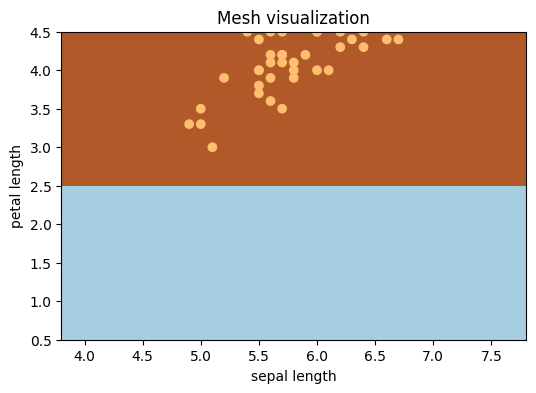

In [39]:
# The data. Converting from DataFrames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 4.0

# Plot the decision boundary and assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

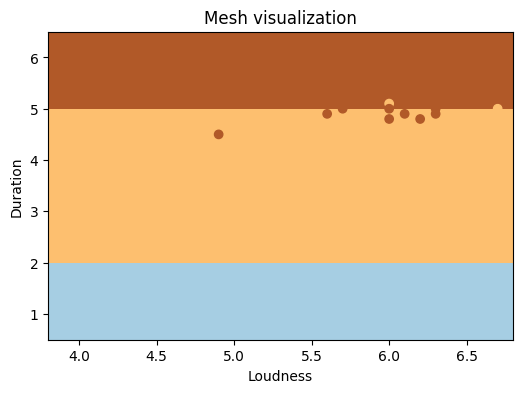

In [40]:
# Play with different mesh sizes here

# The data. Converting from DataFrames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 3.0

# Plot the decision boundary and assign a color to each point in the mesh
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

